In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train_data = pd.read_csv('sales_train_v2.csv')
train_data = train_data.drop('date' , axis = 1) #暂时删除掉具体日期

item_categories = pd.read_csv('item_categories.csv')
items = pd.read_csv('items.csv')
shops = pd.read_csv('shops.csv')

In [3]:
item_id2item_category_id = dict(zip(items['item_id'] , items['item_category_id'])) #构造映射关系

In [4]:
train_data['item_category_id'] = [item_id2item_category_id[x] for x in train_data.item_id] #添加物品类别

In [82]:
#++++++++++++++++

#tt = train_data.loc[(train_data.shop_id == 0) & (train_data.date_block_num == 0)].copy()
#tt = tt.drop(['date_block_num' , 'shop_id' , 'item_price', 'item_category_id'] , axis = 1)
#shop0_date0_cnt_month = tt.groupby('item_id').sum()#.sort_values(by = 'item_id' , ascending = False)
#shop0_date0_cnt_month = shop0_date0_cnt_month.reset_index()

#shop0_date0_cnt_month['date_id'] = 0
#shop0_date0_cnt_month['shop_id'] = 0
#shop0_date0_cnt_month #shop 0 date0 的月销量构造完成

In [20]:
def get():
    shopx_datex_cnt_month = []
    
    for i in range(60): #60 shop2
        _ = [] #临时保存每个shop的物品的月销量
        for j in range(22170): #22170 items
            tt = train_data.loc[(train_data.shop_id == i) & (train_data.date_block_num == j)].copy()
            tt = tt.drop(['date_block_num' , 'shop_id' , 'item_price', 'item_category_id'] , axis = 1)
            
            temp = tt.groupby('item_id').sum()
            temp = temp.reset_index()
            temp['shop_id'] = i
            temp['date_id'] = j
            
            
            _.append(temp)
        
        shopx_datex_cnt_month.append(_)

    return shopx_datex_cnt_month

In [ ]:
shopa_datea_cnt_month = get()

In [6]:
import pickle

In [146]:
file_save = open('shopa_datea_cnt_month.pkl' , 'wb') #已经存起来 防止难受速度慢
pickle.dump(shopa_datea_cnt_month , file_save)

In [7]:
file_load = open('shopa_datea_cnt_month.pkl' , 'rb')
shopa_datea_cnt_month = pickle.load(file_load)

In [17]:
for i in range(60):
    for j in range(84):
        print('shop:%d item:%d month_sale_count:%d' %(i , j , len(shopa_datea_cnt_month[i][j])))

shop:0 item:0 month_sale_count:2385
shop:0 item:1 month_sale_count:2436
shop:0 item:2 month_sale_count:0
shop:0 item:3 month_sale_count:0
shop:0 item:4 month_sale_count:0
shop:0 item:5 month_sale_count:0
shop:0 item:6 month_sale_count:0
shop:0 item:7 month_sale_count:0
shop:0 item:8 month_sale_count:0
shop:0 item:9 month_sale_count:0
shop:0 item:10 month_sale_count:0
shop:0 item:11 month_sale_count:0
shop:0 item:12 month_sale_count:0
shop:0 item:13 month_sale_count:0
shop:0 item:14 month_sale_count:0
shop:0 item:15 month_sale_count:0
shop:0 item:16 month_sale_count:0
shop:0 item:17 month_sale_count:0
shop:0 item:18 month_sale_count:0
shop:0 item:19 month_sale_count:0
shop:0 item:20 month_sale_count:0
shop:0 item:21 month_sale_count:0
shop:0 item:22 month_sale_count:0
shop:0 item:23 month_sale_count:0
shop:0 item:24 month_sale_count:0
shop:0 item:25 month_sale_count:0
shop:0 item:26 month_sale_count:0
shop:0 item:27 month_sale_count:0
shop:0 item:28 month_sale_count:0
shop:0 item:29 mon

shop:9 item:71 month_sale_count:0
shop:9 item:72 month_sale_count:0
shop:9 item:73 month_sale_count:0
shop:9 item:74 month_sale_count:0
shop:9 item:75 month_sale_count:0
shop:9 item:76 month_sale_count:0
shop:9 item:77 month_sale_count:0
shop:9 item:78 month_sale_count:0
shop:9 item:79 month_sale_count:0
shop:9 item:80 month_sale_count:0
shop:9 item:81 month_sale_count:0
shop:9 item:82 month_sale_count:0
shop:9 item:83 month_sale_count:0
shop:10 item:0 month_sale_count:631
shop:10 item:1 month_sale_count:655
shop:10 item:2 month_sale_count:614
shop:10 item:3 month_sale_count:511
shop:10 item:4 month_sale_count:482
shop:10 item:5 month_sale_count:497
shop:10 item:6 month_sale_count:538
shop:10 item:7 month_sale_count:474
shop:10 item:8 month_sale_count:502
shop:10 item:9 month_sale_count:509
shop:10 item:10 month_sale_count:496
shop:10 item:11 month_sale_count:726
shop:10 item:12 month_sale_count:488
shop:10 item:13 month_sale_count:542
shop:10 item:14 month_sale_count:525
shop:10 item:

shop:30 item:15 month_sale_count:1113
shop:30 item:16 month_sale_count:1055
shop:30 item:17 month_sale_count:957
shop:30 item:18 month_sale_count:913
shop:30 item:19 month_sale_count:893
shop:30 item:20 month_sale_count:827
shop:30 item:21 month_sale_count:915
shop:30 item:22 month_sale_count:960
shop:30 item:23 month_sale_count:1160
shop:30 item:24 month_sale_count:967
shop:30 item:25 month_sale_count:514
shop:30 item:26 month_sale_count:0
shop:30 item:27 month_sale_count:0
shop:30 item:28 month_sale_count:0
shop:30 item:29 month_sale_count:0
shop:30 item:30 month_sale_count:0
shop:30 item:31 month_sale_count:0
shop:30 item:32 month_sale_count:0
shop:30 item:33 month_sale_count:0
shop:30 item:34 month_sale_count:0
shop:30 item:35 month_sale_count:0
shop:30 item:36 month_sale_count:0
shop:30 item:37 month_sale_count:0
shop:30 item:38 month_sale_count:0
shop:30 item:39 month_sale_count:0
shop:30 item:40 month_sale_count:0
shop:30 item:41 month_sale_count:0
shop:30 item:42 month_sale_cou

shop:45 item:46 month_sale_count:0
shop:45 item:47 month_sale_count:0
shop:45 item:48 month_sale_count:0
shop:45 item:49 month_sale_count:0
shop:45 item:50 month_sale_count:0
shop:45 item:51 month_sale_count:0
shop:45 item:52 month_sale_count:0
shop:45 item:53 month_sale_count:0
shop:45 item:54 month_sale_count:0
shop:45 item:55 month_sale_count:0
shop:45 item:56 month_sale_count:0
shop:45 item:57 month_sale_count:0
shop:45 item:58 month_sale_count:0
shop:45 item:59 month_sale_count:0
shop:45 item:60 month_sale_count:0
shop:45 item:61 month_sale_count:0
shop:45 item:62 month_sale_count:0
shop:45 item:63 month_sale_count:0
shop:45 item:64 month_sale_count:0
shop:45 item:65 month_sale_count:0
shop:45 item:66 month_sale_count:0
shop:45 item:67 month_sale_count:0
shop:45 item:68 month_sale_count:0
shop:45 item:69 month_sale_count:0
shop:45 item:70 month_sale_count:0
shop:45 item:71 month_sale_count:0
shop:45 item:72 month_sale_count:0
shop:45 item:73 month_sale_count:0
shop:45 item:74 mont

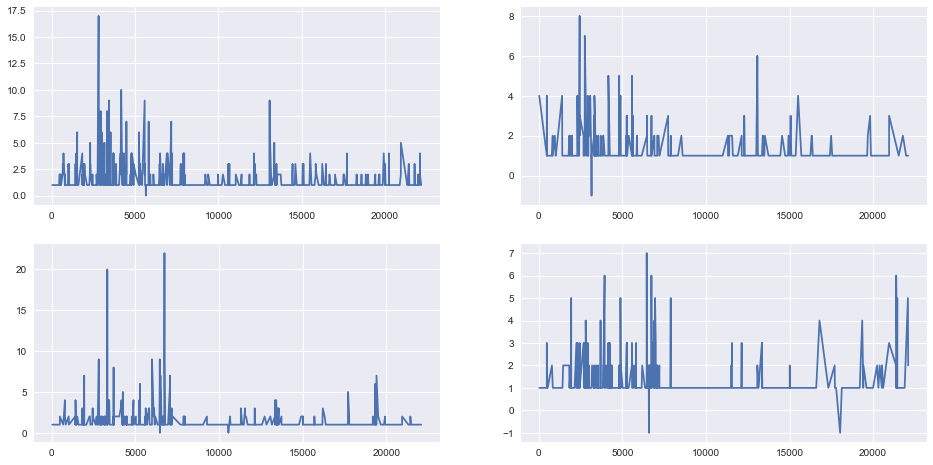

In [19]:
#plt.plot(shop0_date0_cnt_month.item_id , shop0_date0_cnt_month.item_cnt_day)
fig = plt.figure(figsize=(16,8))
fig.add_subplot(221)
plt.plot(shopa_datea_cnt_month[2][0].item_id , shopa_datea_cnt_month[2][0].item_cnt_day)
fig.add_subplot(222)
plt.plot(shopa_datea_cnt_month[2][1].item_id , shopa_datea_cnt_month[2][1].item_cnt_day)
fig.add_subplot(223)
plt.plot(shopa_datea_cnt_month[2][2].item_id , shopa_datea_cnt_month[2][2].item_cnt_day)
fig.add_subplot(224)
plt.plot(shopa_datea_cnt_month[2][3].item_id , shopa_datea_cnt_month[2][3].item_cnt_day)
#shop0_date0_cnt_month.plot('item_id' , 'item_cnt_day' , figsize=(16 , 10))

In [37]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [38]:
lasso = Lasso()
lasso.fit(train[['date_block_num' , 'shop_id' , 'item_id']] , train['item_cnt_day'])

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [26]:
result = lasso.predict(train_data.loc[len(train): , ['date_block_num' , 'shop_id' , 'item_id']])

In [27]:
from sklearn.metrics import mean_squared_error

In [44]:
for i in range(len(result)):
    temp = int(result[i])
    if result[i]-temp>0.5:
        result[i] = temp+1
    else:
        result[i] = temp

In [41]:
train_data.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day',
       'item_category_id'],
      dtype='object')

In [42]:
lasso.fit(train_data[['date_block_num', 'shop_id' , 'item_id']] , train_data.item_cnt_day)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
test_data = pd.read_csv('test.csv')
test_data['date_block_num'] = 34

result = lasso.predict(test_data[['date_block_num' , 'shop_id' , 'item_id']])

In [45]:
result

array([1., 1., 1., ..., 1., 1., 1.])

In [48]:
np.max(result)

1.3248700958134112